## Distribuição normal com SciPy

In [41]:
from scipy.stats import norm, skewnorm, poisson, t, binom
from scipy import stats

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**cdf:** Função de distribuição acumulada (Na distribuição normal, calcula a probabilidade do numero ser menor que x). Nesse exemplo: Qual a probabilidade do número numa distribuição normal ser menor que seis, sendo que a média é oito e desvio padrão dois.

In [4]:
norm.cdf(x= 6, loc= 8, scale= 2)

0.15865525393145707

**sf:** Survival function (Na distribuição normal, calcula a probabilidade do numero ser maior que x). Nesse exemplo: Qual a probabilidade do número numa distribuição normal ser maior que seis, sendo que a média é oito e desvio padrão dois.

In [5]:
norm.sf(x=6, loc=8, scale=2)

0.8413447460685429

Qual a probabilidade do número numa distribuição normal ser menor que cinco, ou maior que dez, sendo que a média é oito e desvio padrão dois.

In [6]:
norm.cdf(x= 5, loc= 8, scale= 2) + norm.sf(x= 10, loc= 8, scale= 2)

0.22546245520031516

Qual a probabilidade do número numa distribuição normal ser menor que doze, e maior que dez, sendo que a média é oito e desvio padrão dois.

In [7]:
norm.cdf(x= 12, loc= 8, scale= 2) - norm.cdf(x= 10, loc= 8, scale= 2)

0.13590512198327787

In [8]:
arr = norm.rvs(size= 1000, loc=10, scale=2)

In [9]:
stats.describe(arr)

DescribeResult(nobs=1000, minmax=(3.3579286185055475, 17.188437454361114), mean=9.939673101983054, variance=3.926702410678129, skewness=0.08443899020847109, kurtosis=0.19171056994849822)

**Teste de Shapiro-Wilk:** Mostra o p-valor para saber a distribuição. Hipótese nula de Shapiro-Wilk diz que os dados estão distribuidos normalmente. Se p-valor >0.05 os dados estão normais (não é possível rejeitar a hipótese). Se ele é menor que 0.05 ele rejeita a hipótese

In [10]:
stats.shapiro(arr)

ShapiroResult(statistic=0.998393177986145, pvalue=0.48685896396636963)

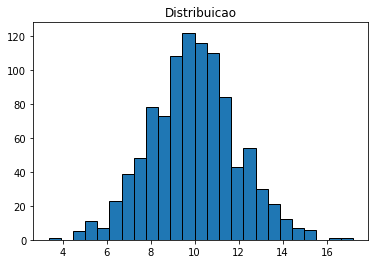

In [11]:
plt.hist(arr, bins=25, edgecolor='k')
plt.title('Distribuicao');

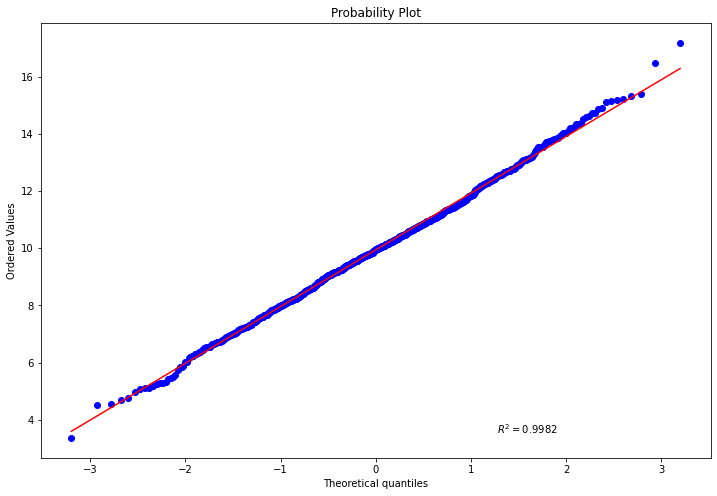

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
stats.probplot(arr, fit=True, plot=ax, rvalue=True);

**Plot de probabilidade:** Quanto mais rente a linha, e apenas os extremos estiverem um pouco fora dela, mais alinhado com a reta os dados estão

## Plotando gráficos com outra distribuição:

In [13]:
arr2 = skewnorm.rvs(a=-10, size= 1000, loc=10, scale=2)

In [14]:
stats.describe(arr2)

DescribeResult(nobs=1000, minmax=(1.5712616349693622, 10.297983323786502), mean=8.353630636273346, variance=1.5650596397176537, skewness=-0.999361763703294, kurtosis=1.2958539236480622)

In [15]:
stats.shapiro(arr2)

ShapiroResult(statistic=0.9370115995407104, pvalue=3.819375939023187e-20)

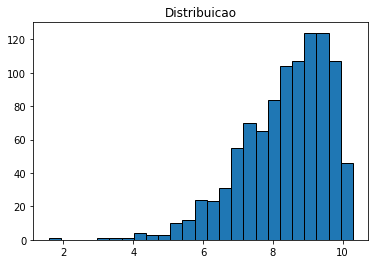

In [16]:
plt.hist(arr2, bins=25, edgecolor='k')
plt.title('Distribuicao');

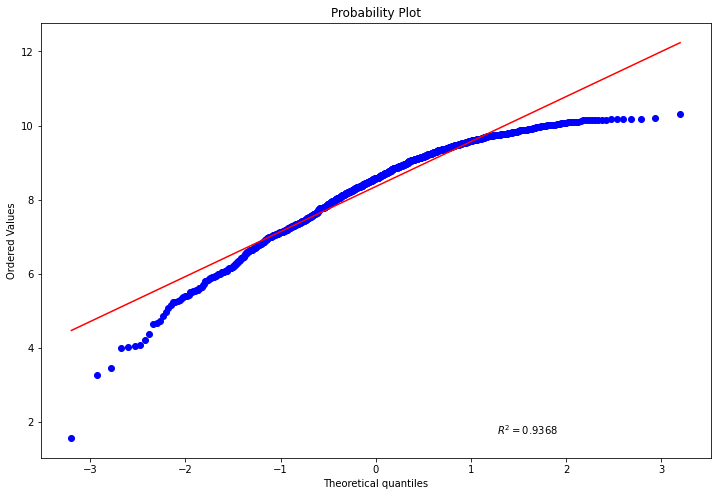

In [17]:
fig2, ax2 = plt.subplots(figsize=(12, 8))
stats.probplot(arr2, fit=True, plot=ax2, rvalue=True);

## Distribuição de Poisson:

**Sobre a distribuição de Poisson:** Calcula a probabilidade de um evento acontecer, dado um período de tempo. Por exemplo: Em uma determinada cidade 5 pessoas são atropeladas a cada 10 minutos. Qual a probabilidade de 2 pessoas serem atropeladas em 10 min

**Onde:**

**λ (Lambda) = mu (Python):** É o número de ocorrências em média que aconteceram

**x! = k (Python):** O número que eu quero descobrir, sendo ele fatorial

**e:** Número de Euler (Base dos logaritmos naturais = 2.71828)

![image](https://cdn.educba.com/academy/wp-content/uploads/2019/06/Poisson-Distribution-Formula-1.jpg)

**Exemplo I:** A probabilidade de 6 pessoas serem atropeladas num intervalo de 10 min, quando a média é de 5 atropelamentos a cada 10 min

In [32]:
poisson.pmf(k=6, mu=5)

0.1462228081398754

**Exemplo II:** A probabilidade de menos de 3 pessoas serem atropeladas num intervalo de 10 min

In [33]:
poisson.cdf(k= 3, mu=5)

0.2650259152973616

**Exemplo III:** A probabilidade mais de 1 pessoa ser atropelada num intervalo de 10 min

In [34]:
poisson.sf(k= 1, mu=5)

0.9595723180054873

## Distribuição Binomial:

**Sobre a distribuição binomial:** Serve para calcular um evento que se repete um número x de vezes, por exemplo 10, e se descobrir a probabilidade de um evento y acontecer y vezes naquelas x vezes. Por exemplo: Existe uma prova com 50 questões. Qual a probabilidade de se acertar metade dela sem ter estudado nada? Levando em conta que se tem 5 alternativas cada pergunta

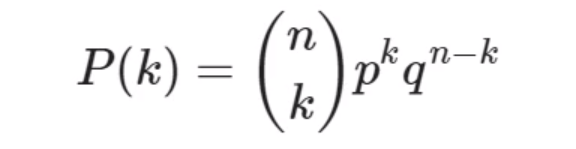

**Onde:**

**N:** Número de ensaios (Número de ocasiões que já aconteceram. Nesse caso 50)

**K:** Número de sucessos (Que eu quero que aconteça. Nesse caso, 25, metade)

**p:** Probabilidade de cada evento acontecer (Nesse caso, 0.2, por existirem 5 questões)

**q:** Número de fracassos

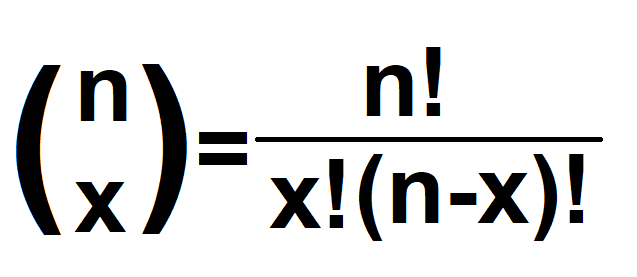

**Obs:** A fórmula de nx é a combinação entre o número de ensaios e o número de sucessos

In [64]:
format(round(binom.pmf(k=25, n=50, p=0.2)*100, 5), '.20f')

'0.00016000000000000001'

**Exemplo II:** Um casal quer ter 5 filhos. Qual a probabilidade de 3 serem meninas?

In [71]:
binom.pmf(k=3, n=5, p=0.5)*100

31.249999999999982